In [51]:
d = open('cpgIslandExt_chr1.tsv', 'r+').readlines()
seq= [i.replace("\n", "").upper() for i in "".join(open('hg38_chr1_and_chr2.fa', 'r+').readlines()[1:]).split(">chr2")]

In [52]:
d = [i[:len(i)-1].split("\t")[1:] for i in d[1:]]

In [53]:
r = {}
for i in d:
    if i[2] not in r.keys():
        r[i[2]] = [i]
    else:
        r[i[2]].append(i)
seq_1 , seq_2 = seq[0], seq[1]

In [58]:
#создадим две матрицы переходов
model = {}
actg = {}
for i in d:
    for j in range(int(i[0])+1, int(i[1])):
        if seq_1[j]+seq_1[j+1] not in model.keys():
            model[seq_1[j]+seq_1[j+1]] = 1
        else:
            model[seq_1[j]+seq_1[j+1]] += 1
        if seq_1[j-1] not in actg.keys():
            actg[seq_1[j-1]] = 1
        else:
            actg[seq_1[j-1]] += 1
for i in model:
    model[i] = model[i]/actg[i[0]]

In [66]:
non_model = {}
actg_2 = {}
r = seq_1
for i in d:
    r = r[:int(i[0])] + " " * (int(i[1]) - int(i[0])) + r[int(i[1]):]
r = r.replace(" ", "")
for j in range(1, len(r)):
        if r[j-1]+r[j] not in non_model.keys():
            non_model[r[j-1]+r[j]] = 1
        else:
            non_model[r[j-1]+r[j]] += 1
        if r[j-1] not in actg_2.keys():
            actg_2[r[j-1]] = 1
        else:
            actg_2[r[j-1]] += 1
for i in non_model:
    non_model[i] = non_model[i]/actg_2[i[0]]

In [73]:
#используя сумму логирифм коэффицент найдем правдоподобие cpg-островка 
import math as m
import matplotlib.pyplot as plt
x = []
y = []
for i in range(10000000, 10100000-200):
    pl = 1
    for j in range(i+1 , i+200):
        pl += m.log(model[seq_2[j-1] + seq_2[j]] / non_model[seq_2[j-1] + seq_2[j]])
    x.append(i)
    y.append(pl)

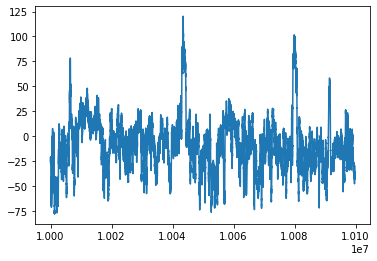

In [74]:
plt.plot(x, y)
plt.show()

In [69]:
import numpy as np
from scipy.signal import argrelextrema
# найдем локальные пики

In [70]:
for i in list(argrelextrema(np.array(y), np.greater))[0]:
    if y[i] > 42:
        print(y[i], i)

42.56348808042855 6267
43.77605610983769 6269
46.13193927014206 6273
42.25783667026458 6277
44.07064082560616 6292
49.0724061321504 6299
49.417738521893455 6301
50.466760424032 6305
52.763338012745706 6307
49.34876082171971 6311
51.58207541253283 6314
56.5740759534178 6320
56.148824114123954 6327
57.342701518605764 6330
62.730574265905645 6338
64.52730932955964 6343
64.31232853004428 6345
64.28201156947155 6347
69.56245815791819 6353
74.46765495400632 6359
71.9117972475684 6364
71.91188130029157 6367
71.9689461379255 6369
69.23034465442107 6373
69.45994788686568 6383
68.23139063963632 6387
68.49196733556074 6391
68.56253090261808 6393
69.73427024530282 6398
72.06483787702427 6404
75.33506172196202 6411
72.9838002608969 6414
71.62879502361629 6421
70.3061094836991 6425
69.00033442428204 6431
66.80514238786077 6438
70.5052238942038 6443
73.9749231173196 6446
75.4680636530424 6451
75.54381428320292 6454
75.5134973226302 6456
74.6872160492518 6462
73.79418823545198 6464
75.11991034982202 6

In [ ]:
#коэффицент распределен по пикам "вилкой" , в таком случае каждому максимум присвоено начала , при пересечениях островки удлинняются 
#ans = [[начало, конец],...]
ans = [[6273,6838],  [12038,12266],  [43156,44030 ],[79903,80253], [91492,91828]